In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #resimler üzerinde çizim yapmak için
#çizim yapılan resimleri kaydetmek için
%matplotlib inline

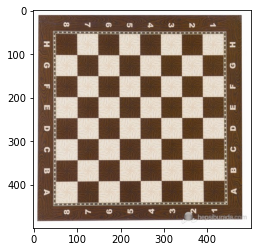

In [70]:
flat_chess = cv2.imread('santranc_tahtasi.jpg')
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

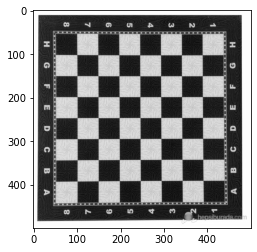

In [71]:
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

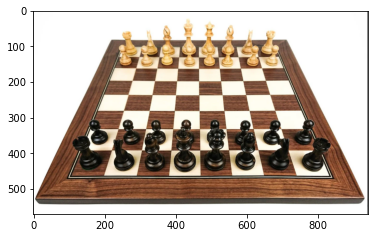

In [95]:
real_chess= cv2.imread('santranc.png')
real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

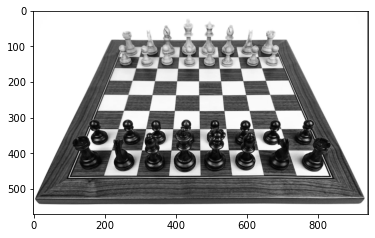

In [96]:
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [79]:
gray_flat_chess

array([[255, 255, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [80]:
gray=np.float32(gray_flat_chess)
gray

array([[255., 255., 254., ..., 255., 255., 255.],
       [254., 254., 254., ..., 255., 255., 255.],
       [254., 254., 254., ..., 254., 254., 254.],
       ...,
       [254., 254., 254., ..., 254., 254., 254.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [82]:
gray.shape

(500, 500)

In [83]:
#cornerHarris köşe algılama algoritmasıdır.
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [84]:
dst = cv2.dilate(dst,None)

In [87]:
#cornerHarris uyguladığımız fotonun mac değerlerinin %1 ini alıyoruz ve bunun dst den küçük olmasını istiyoruz
#daha sonra bu noktaları kırmız renkte boyuyoruz
flat_chess[dst>0.01*dst.max()]=[255,0,0]

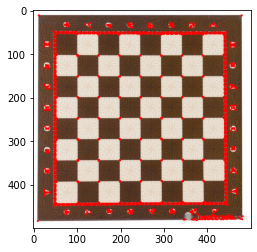

In [88]:
plt.imshow(flat_chess)

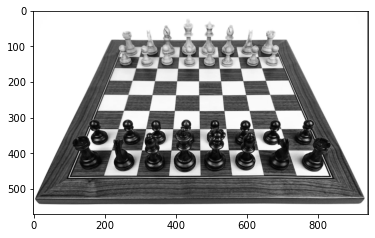

In [97]:
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY,0)
plt.imshow(gray_real_chess,cmap='gray')

In [98]:
gray_real_chess

array([[ 59, 246, 254, ..., 254, 129,  57],
       [ 59, 246, 254, ..., 254, 129,  57],
       [ 59, 246, 254, ..., 254, 129,  57],
       ...,
       [ 57, 247, 255, ..., 255, 129,  57],
       [ 57, 247, 255, ..., 255, 129,  57],
       [ 57, 247, 255, ..., 255, 129,  57]], dtype=uint8)

In [99]:
gray=np.float32(gray_real_chess)
gray

array([[ 59., 246., 254., ..., 254., 129.,  57.],
       [ 59., 246., 254., ..., 254., 129.,  57.],
       [ 59., 246., 254., ..., 254., 129.,  57.],
       ...,
       [ 57., 247., 255., ..., 255., 129.,  57.],
       [ 57., 247., 255., ..., 255., 129.,  57.],
       [ 57., 247., 255., ..., 255., 129.,  57.]], dtype=float32)

In [100]:
gray.shape

(571, 941)

In [101]:
#cornerHarris köşe algılama algoritmasıdır.
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)

In [102]:
#cornerHarris uyguladığımız fotonun mac değerlerinin %1 ini alıyoruz ve bunun dst den küçük olmasını istiyoruz
#daha sonra bu noktaları kırmız renkte boyuyoruz
real_chess[dst>0.01*dst.max()]=[255,0,0]

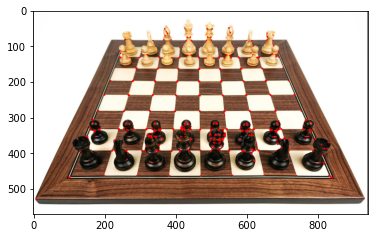

In [103]:
plt.imshow(real_chess)

In [104]:
# https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html
#bu da bir köşegen bulma algoritmasıdır
flat_chess = cv2.imread('santranc_tahtasi.jpg')
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

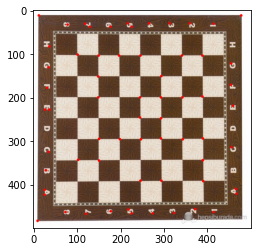

In [112]:
corners= cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)
corners=np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)
    
    plt.imshow(flat_chess)


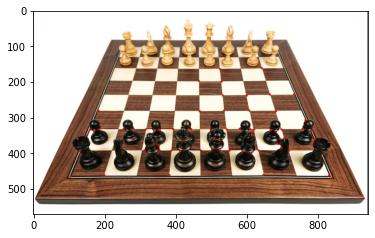

In [115]:
real_chess= cv2.imread('santranc.png')
real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)


corners= cv2.goodFeaturesToTrack(gray_real_chess,64,0.01,10)
corners=np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)
    
    plt.imshow(real_chess)